In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:

df = pd.read_csv('Byte2Beat/Data/Cardiac Failure/cardiac_failure_processed.csv', delimiter=',')
df = df.drop(columns=["Unnamed: 0", 'id'])

In [90]:
df.isnull().values.any()

np.False_

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  float64
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.4 MB


In [92]:

df['age']=df['age']*100
df['age'] = df['age'].astype(int)

In [93]:
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,66.638357,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,19.104408,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,68.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,81.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


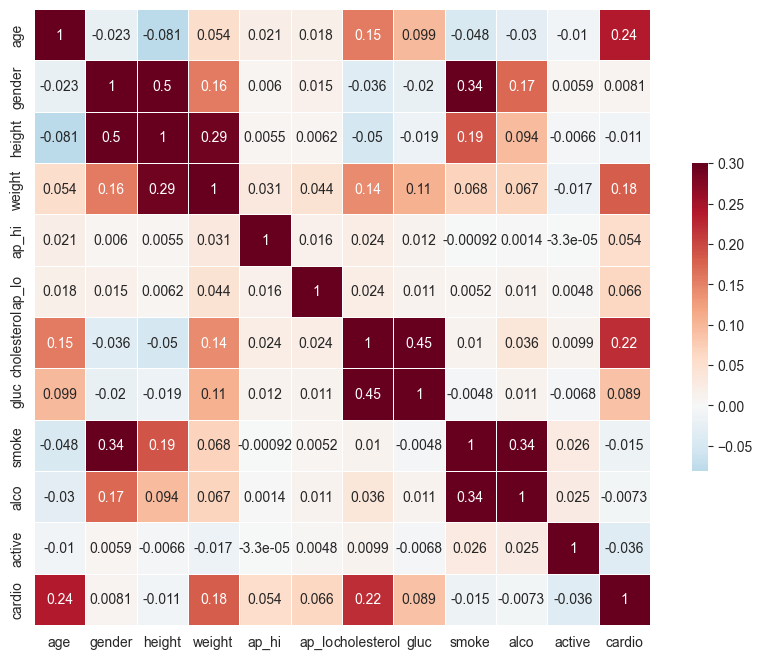

In [94]:
corr = df.corr()
sns.heatmap(corr, cmap="RdBu_r", vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

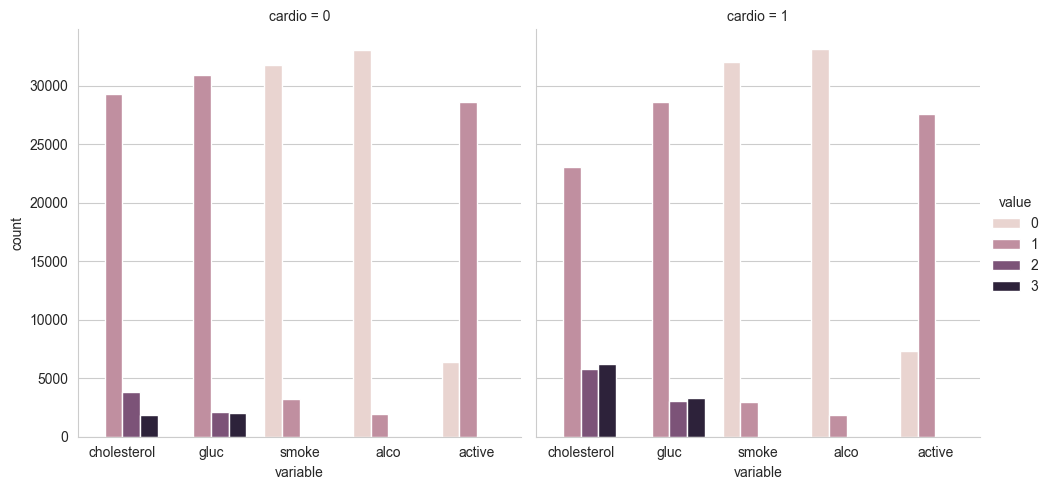

In [95]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

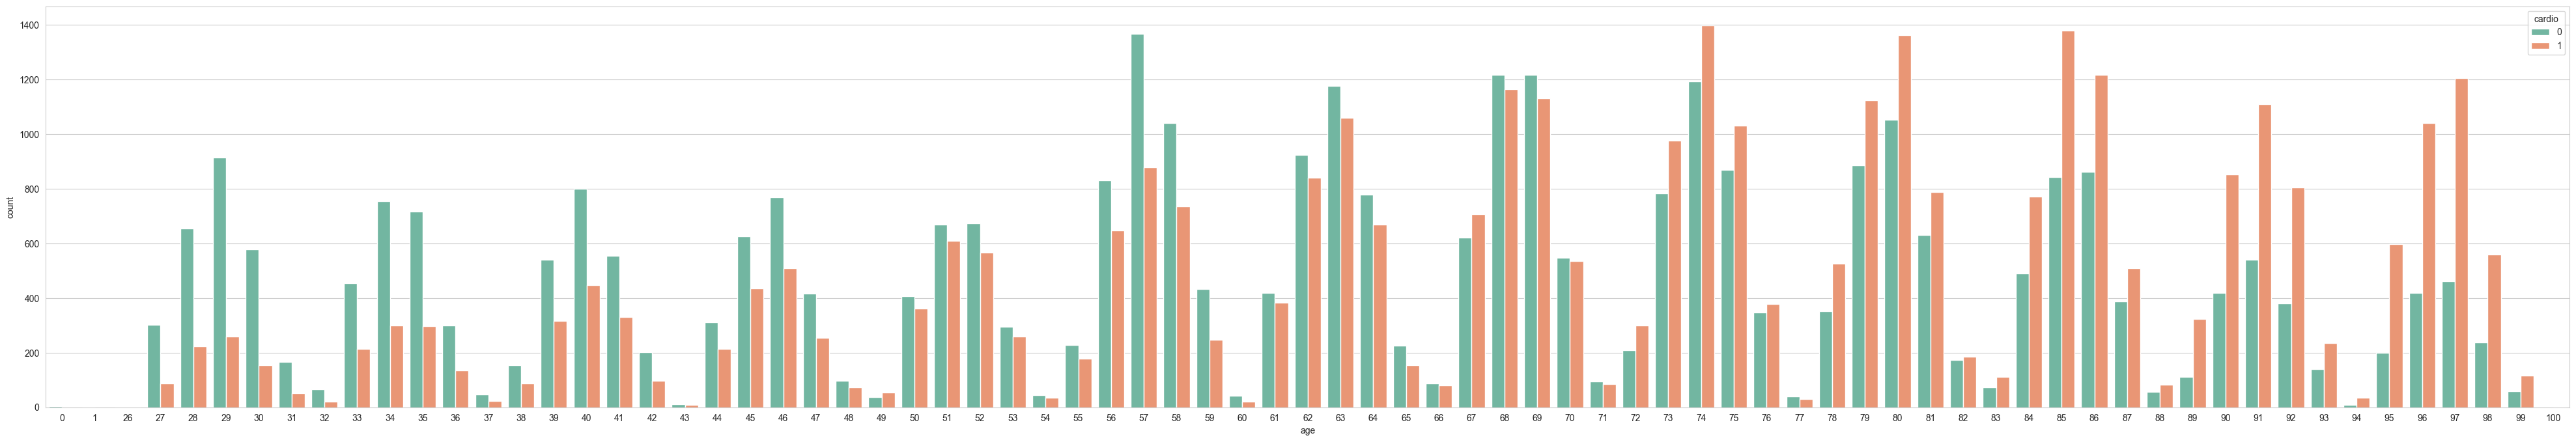

In [96]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 50, 8
sns.countplot(x='age', hue='cardio', data = df, palette="Set2");

The trend shows as age increases risk of having cvd increases

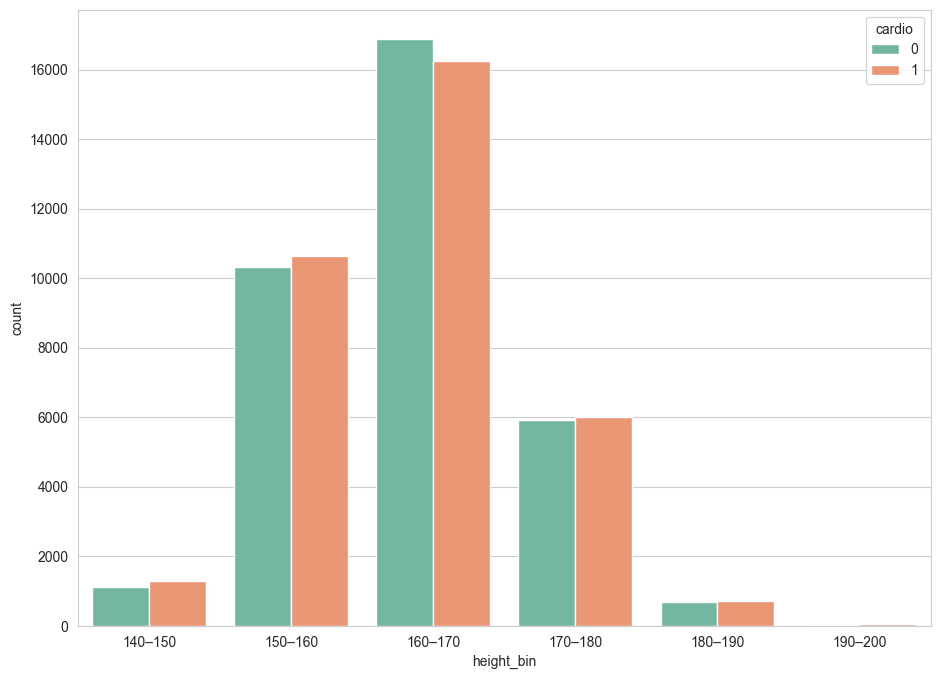

In [97]:
rcParams['figure.figsize'] = 11, 8
df['height_int']=df['height'].astype(int)
df['height_bin'] = pd.cut(
    df['height_int'],
    bins=[140, 150, 160, 170, 180, 190, 200],
    labels=[
        '140–150', '150–160', '160–170',
        '170–180', '180–190', '190–200'
    ]
)

sns.countplot(x='height_bin', hue='cardio', data = df, palette="Set2",);

no such relation with height

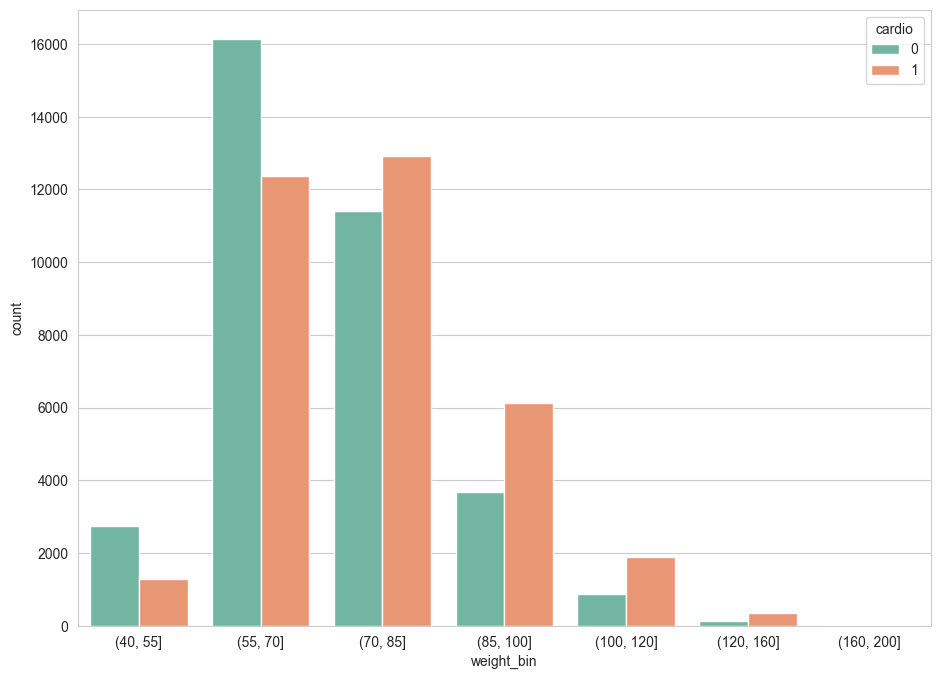

In [98]:
df['weight_int']=df['weight'].astype(int)
df['weight_bin'] = pd.cut(
    df['weight_int'],
    bins=[40, 55, 70, 85, 100, 120, 160,200],
)

sns.countplot(x='weight_bin', hue='cardio', data = df, palette="Set2");

This shows risk of cvd increases as weight increases

In [99]:
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)

In [100]:
df["bmi"].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: bmi, dtype: float64

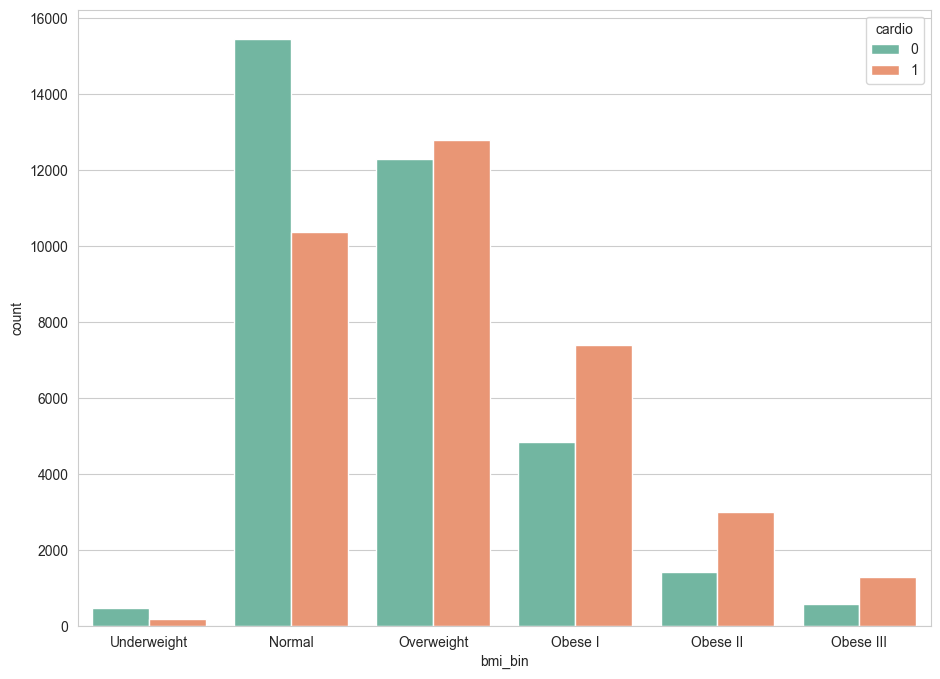

In [101]:
df["bmi_bin"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, 35, 40, 100],
    labels=[
        "Underweight",
        "Normal",
        "Overweight",
        "Obese I",
        "Obese II",
        "Obese III"
    ]
)

sns.countplot(
    x="bmi_bin",
    hue="cardio",
    data=df,
    palette="Set2"
)
plt.show()

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  int64   
 1   gender       70000 non-null  int64   
 2   height       70000 non-null  int64   
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  int64   
 5   ap_lo        70000 non-null  int64   
 6   cholesterol  70000 non-null  int64   
 7   gluc         70000 non-null  int64   
 8   smoke        70000 non-null  int64   
 9   alco         70000 non-null  int64   
 10  active       70000 non-null  int64   
 11  cardio       70000 non-null  int64   
 12  height_int   70000 non-null  int64   
 13  height_bin   69798 non-null  category
 14  weight_int   70000 non-null  int64   
 15  weight_bin   69906 non-null  category
 16  bmi          70000 non-null  float64 
 17  bmi_bin      69971 non-null  category
dtypes: category(3), float64(2)